In [4]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import urllib.request as req
import time
import folium
import geopandas as gpd
import html5lib as html

In [44]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [5]:
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import cross_validate

# df_total = pd.read_csv('../JejuData/jeju_sales_category2.csv')
# df_total.reset_index(inplace=True,drop=True)
# df_total['연도']=[year.split('-')[0] for year in df_total['년월']]
# df_total['월']=[year.split('-')[1] for year in df_total['년월']]
# df_onehot=df_total.copy()

# for column in ['읍면동명','업종명']:
#     df_total2=pd.get_dummies(df_total[column],prefix=column)
#     df_onehot=pd.concat([df_onehot,df_total2],axis=1)

# df_onehot.drop(columns=['시도명','지역구분','읍면동명','업종명','이용자 구분','업종명 대분류','업종코드','연도','매장수','년월'],inplace=True)

# knn=KNeighborsRegressor(n_jobs=-1,)

# train_input,test_input,train_target,test_target=train_test_split(df_onehot.iloc[:,1:],df_onehot[['이용금액']],random_state=42)

# scores=cross_validate(knn,train_input,train_target,n_jobs=-1,cv=3)
# print(np.mean(scores['test_score']))
# print(np.mean(scores['score_time']))

> 월 컬럼도 one hot encoding    
> 관광지 수 or 인기 관광지 몇 개 포함하는지?

In [6]:
df_2017_2019 = pd.read_csv("../JejuData/산업대분류_2017_2019.csv",encoding='euc-kr')
df_2020_2021 = pd.read_csv("../JejuData/산업대분류_2020_2021.csv",encoding='euc-kr')

In [7]:
df_2017_2019.drop(index=0,inplace=True)
df_2020_2021.drop(index=[0,1],inplace=True)

In [8]:
df_2017_2019.head()

,읍·면·동별(1),읍·면·동별(2),산업대분류별(1),2017,2018,2019
1,제주시,한림읍,숙박 및 음식점업,826,921,1061
2,제주시,애월읍,숙박 및 음식점업,912,1044,1208
3,제주시,구좌읍,숙박 및 음식점업,865,993,1089
4,제주시,조천읍,숙박 및 음식점업,681,790,862
5,제주시,한경면,숙박 및 음식점업,288,344,418


In [9]:
df_2020_2021.head()

,읍·면·동별(1),읍·면·동별(2),산업대분류별(1),2020,2021
2,제주시,한림읍,숙박 및 음식점업,1249,1294
3,제주시,애월읍,숙박 및 음식점업,1503,1613
4,제주시,구좌읍,숙박 및 음식점업,1334,1405
5,제주시,조천읍,숙박 및 음식점업,1014,1141
6,제주시,한경면,숙박 및 음식점업,530,608


In [10]:
df_2017_2019['읍·면·동별(2)'].tolist() == df_2020_2021['읍·면·동별(2)'].tolist()

True

In [11]:
hospitality = pd.merge(df_2017_2019,df_2020_2021,how='inner',on='읍·면·동별(2)')

In [12]:
hospitality = hospitality.iloc[:,[1,3,4,5,8,9]]

In [13]:
hospitality.rename(columns={'읍·면·동별(2)':'년도'},inplace=True)

In [14]:
hospitality = hospitality.T

In [15]:
hospitality.columns = hospitality.iloc[0]

In [16]:
hospitality

년도,한림읍,애월읍,구좌읍,조천읍,한경면,추자면,우도면,일도1동,일도2동,이도1동,...,중앙동,천지동,효돈동,영천동,동홍동,서홍동,대륜동,대천동,중문동,예래동
년도,한림읍,애월읍,구좌읍,조천읍,한경면,추자면,우도면,일도1동,일도2동,이도1동,...,중앙동,천지동,효돈동,영천동,동홍동,서홍동,대륜동,대천동,중문동,예래동
2017,826,912,865,681,288,75,164,238,559,322,...,419,308,84,83,299,106,284,172,283,219
2018,921,1044,993,790,344,79,191,240,573,366,...,431,322,96,88,304,124,320,218,319,249
2019,1061,1208,1089,862,418,84,188,247,574,381,...,429,335,104,94,320,131,333,237,352,256
2020,1249,1503,1334,1014,530,105,204,253,640,403,...,470,351,125,113,365,156,386,274,384,285
2021,1294,1613,1405,1141,608,116,198,260,654,410,...,472,352,131,116,369,172,411,293,422,291


In [17]:
hospitality.drop(index='년도',inplace=True)

In [18]:
# hospitality.to_csv("../JejuData/hospitality.csv",index=False)

In [19]:
hospitality

년도,한림읍,애월읍,구좌읍,조천읍,한경면,추자면,우도면,일도1동,일도2동,이도1동,...,중앙동,천지동,효돈동,영천동,동홍동,서홍동,대륜동,대천동,중문동,예래동
2017,826,912,865,681,288,75,164,238,559,322,...,419,308,84,83,299,106,284,172,283,219
2018,921,1044,993,790,344,79,191,240,573,366,...,431,322,96,88,304,124,320,218,319,249
2019,1061,1208,1089,862,418,84,188,247,574,381,...,429,335,104,94,320,131,333,237,352,256
2020,1249,1503,1334,1014,530,105,204,253,640,403,...,470,351,125,113,365,156,386,274,384,285
2021,1294,1613,1405,1141,608,116,198,260,654,410,...,472,352,131,116,369,172,411,293,422,291


In [20]:
e_stat = pd.read_csv("../JejuData/e지방지표_2019_01_2022_11.csv",encoding='euc-kr')
e_stat.head()

,지역별(1),지표별(1),지표별(2),2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,...,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,제주특별자치도,인구,주민등록인구 (명),667337.0,667522.0,668120.0,668648.0,669328.0,669771.0,670209.0,...,677143,677218,677413,677766,678012,678491,679016,678426,678324,678373
1,제주특별자치도,인구,순이동인구 (명),90.0,136.0,527.0,418.0,576.0,396.0,346.0,...,502,233,389,437,314,533,603,64,91,137
2,제주특별자치도,인구,전입인구 (명),11509.0,10679.0,8536.0,7462.0,7334.0,6316.0,7034.0,...,10701,8523,6743,6977,6502,6505,7430,5855,5802,6218
3,제주특별자치도,인구,전출인구 (명),11419.0,10543.0,8009.0,7044.0,6758.0,5920.0,6688.0,...,10199,8290,6354,6540,6188,5972,6827,5791,5711,6081
4,제주특별자치도,인구,사망자수 (명),373.0,344.0,352.0,338.0,322.0,320.0,292.0,...,-,-,-,-,-,-,-,-,-,-


In [21]:
e_stat = e_stat.iloc[:,2:]

In [22]:
e_stat

,지표별(2),2019.01,2019.02,2019.03,2019.04,2019.05,2019.06,2019.07,2019.08,2019.09,...,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11
0,주민등록인구 (명),667337.000,667522.000,668120.000,668648.000,669328.000,669771.000,670209.000,670521.000,670610.000,...,677143,677218,677413,677766,678012,678491,679016,678426,678324,678373
1,순이동인구 (명),90.000,136.000,527.000,418.000,576.000,396.000,346.000,242.000,42.000,...,502,233,389,437,314,533,603,64,91,137
2,전입인구 (명),11509.000,10679.000,8536.000,7462.000,7334.000,6316.000,7034.000,6975.000,6278.000,...,10701,8523,6743,6977,6502,6505,7430,5855,5802,6218
3,전출인구 (명),11419.000,10543.000,8009.000,7044.000,6758.000,5920.000,6688.000,6733.000,6236.000,...,10199,8290,6354,6540,6188,5972,6827,5791,5711,6081
4,사망자수 (명),373.000,344.000,352.000,338.000,322.000,320.000,292.000,333.000,294.000,...,-,-,-,-,-,-,-,-,-,-
5,출생아수 (명),455.000,379.000,409.000,408.000,349.000,322.000,372.000,357.000,361.000,...,-,-,-,-,-,-,-,-,-,-
6,이혼건수 (건),145.000,146.000,136.000,139.000,120.000,120.000,149.000,152.000,129.000,...,-,-,-,-,-,-,-,-,-,-
7,혼인건수 (건),309.000,263.000,244.000,334.000,319.000,234.000,270.000,226.000,208.000,...,-,-,-,-,-,-,-,-,-,-
8,소비자물가지수 (2020=100),98.770,99.140,98.960,99.380,99.830,99.610,99.370,99.710,100.270,...,105.92,106.77,107.74,108.58,109.59,109.93,109.96,110.47,110.43,109.97
9,예금은행대출금액 (십억원),16749.000,16812.000,16871.000,16978.000,17157.000,17198.000,17407.000,17515.000,17639.000,...,21169,21471,21519,21571,21511,21533,21532,21674,21683,21642


In [23]:
jeju_total = pd.read_csv("../JejuData/jeju_total.csv")
df = pd.DataFrame(jeju_total.sum(axis=0))
df.drop(index=['행정동명','권역'],inplace=True)

In [24]:
df.T

,2019년 01월,2019년 02월,2019년 03월,2019년 04월,2019년 05월,2019년 06월,2019년 07월,2019년 08월,2019년 09월,2019년 10월,...,2022년 02월,2022년 03월,2022년 04월,2022년 05월,2022년 06월,2022년 07월,2022년 08월,2022년 09월,2022년 10월,2022년 11월
0,9867817,9106123,9606309,10702594,11508008,10830123,11172721,13987253,9819200,12192708,...,14286523,10685989,14106812,16018468,15997746,15773857,18291765,12420655,14423739,11939136


In [25]:
df.T.values

array([[9867817, 9106123, 9606309, 10702594, 11508008, 10830123,
        11172721, 13987253, 9819200, 12192708, 10580473, 10460188,
        11541691, 47787, 5157930, 5016698, 8196713, 8520958, 10336204,
        13857768, 7777872, 11472781, 12321794, 6619417, 5790361, 8673000,
        9959102, 12743384, 13830794, 13321779, 14176251, 13653072,
        10378792, 14958960, 14819681, 6619417, 16195971, 14286523,
        10685989, 14106812, 16018468, 15997746, 15773857, 18291765,
        12420655, 14423739, 11939136]], dtype=object)

In [26]:
e_stat.set_index('지표별(2)',inplace=True)

In [27]:
df = df.T

In [28]:
df.columns = e_stat.columns

In [29]:
stat_joined = pd.concat([e_stat,df])

In [30]:
stat_joined.rename(index={0:'관광객 (명)'},inplace=True)

In [55]:
stat_joined = stat_joined.iloc[:,:36]

In [58]:
stat_joined = stat_joined.T

In [59]:
stat_joined.columns

Index(['주민등록인구 (명)', '순이동인구 (명)', '전입인구 (명)', '전출인구 (명)', '사망자수 (명)',
       '출생아수 (명)', '이혼건수 (건)', '혼인건수 (건)', '소비자물가지수 (2020=100)',
       '예금은행대출금액 (십억원)', '예금은행예금액 (십억원)', '소비자물가 등락률 (%)', '경제활동인구(시도) (천명)',
       '경제활동참가율(시도) (%)', '고용률(시도) (%)', '취업자수(시도) (천명)', '실업률(시도)',
       '고용보험 신규취득자수 (명)', '실업자수 (천명)', '취업자증감 (천명)',
       '주택월세가격지수 (2017.11 = 100.0)', '주택월세통합가격지수 (2017.11 = 100.0)',
       '주택매매가격변동률 (%)', '주택전세가격지수 (2017.11 = 100.0)', '주택매매가격지수', '지가변동률 (%)',
       '건축허가면적증감률 (%)', '건축착공면적 (㎡)', '아파트월세가격지수 (2017.11 = 100.0)',
       '아파트월세통합가격지수 (2017.11 = 100.0)', '아파트전세가격지수 (2017.11 = 100.0)',
       '아파트매매가격지수', '제조업생산 증감률 (%)', '백화점판매액 (백만원)', '대형소매점판매액 (백만원)', '어음부도율',
       '수입액 (100만달러)', '수출액 (100만달러)', '광공업생산지수 (2015=100)', '관광객 (명)'],
      dtype='object')

In [95]:
stat_joined

,주민등록인구 (명),순이동인구 (명),전입인구 (명),전출인구 (명),사망자수 (명),출생아수 (명),이혼건수 (건),혼인건수 (건),소비자물가지수 (2020=100),예금은행대출금액 (십억원),...,아파트전세가격지수 (2017.11 = 100.0),아파트매매가격지수,제조업생산 증감률 (%),백화점판매액 (백만원),대형소매점판매액 (백만원),어음부도율,수입액 (100만달러),수출액 (100만달러),광공업생산지수 (2015=100),관광객 (명)
2019.01,667337.0,90.0,11509.0,11419.0,373.0,455.0,145.0,309.0,98.77,16749.0,...,98.2,96.9,30.7,0.0,43964.0,0.0,33.0,12.0,129.5,9867817
2019.02,667522.0,136.0,10679.0,10543.0,344.0,379.0,146.0,263.0,99.14,16812.0,...,98.0,96.7,16.3,0.0,40336.0,0.0,25.0,10.0,100.8,9106123
2019.03,668120.0,527.0,8536.0,8009.0,352.0,409.0,136.0,244.0,98.96,16871.0,...,97.8,96.5,0.5,0.0,39427.0,0.0,32.0,13.0,111.5,9606309
2019.04,668648.0,418.0,7462.0,7044.0,338.0,408.0,139.0,334.0,99.38,16978.0,...,97.4,96.4,5.7,0.0,38639.0,0.0,27.0,12.0,102.0,10702594
2019.05,669328.0,576.0,7334.0,6758.0,322.0,349.0,120.0,319.0,99.83,17157.0,...,97.2,96.3,0.5,0.0,42209.0,0.0,43.0,10.0,101.8,11508008
2019.06,669771.0,396.0,6316.0,5920.0,320.0,322.0,120.0,234.0,99.61,17198.0,...,96.9,96.2,-12.3,0.0,40866.0,1.0,29.0,10.0,100.8,10830123
2019.07,670209.0,346.0,7034.0,6688.0,292.0,372.0,149.0,270.0,99.37,17407.0,...,96.5,95.7,-14.7,0.0,43404.0,0.0,44.0,11.0,114.9,11172721
2019.08,670521.0,242.0,6975.0,6733.0,333.0,357.0,152.0,226.0,99.71,17515.0,...,96.1,95.3,-12.2,0.0,45734.0,0.0,36.0,11.0,115.0,13987253
2019.09,670610.0,42.0,6278.0,6236.0,294.0,361.0,129.0,208.0,100.27,17639.0,...,95.6,94.9,-21.5,0.0,45366.0,0.0,31.0,13.0,98.2,9819200
2019.10,670738.0,83.0,7095.0,7012.0,345.0,378.0,156.0,272.0,100.47,17955.0,...,95.2,94.5,9.4,0.0,40475.0,0.0,34.0,14.0,114.7,12192708


In [ ]:
# stat_joined_pair = stat_joined[['주민등록인구 (명)', '순이동인구 (명)', '전입인구 (명)', '전출인구 (명)', '사망자수 (명)',
#        '출생아수 (명)', '이혼건수 (건)', '혼인건수 (건)', '소비자물가지수 (2020=100)',
#        '예금은행대출금액 (십억원)', '예금은행예금액 (십억원)', '소비자물가 등락률 (%)', '경제활동인구(시도) (천명)',
#        '경제활동참가율(시도) (%)', '고용률(시도) (%)', '취업자수(시도) (천명)', '실업률(시도)',
#        '고용보험 신규취득자수 (명)', '실업자수 (천명)', '취업자증감 (천명)',
#        '주택월세가격지수 (2017.11 = 100.0)', '주택월세통합가격지수 (2017.11 = 100.0)',
#        '주택매매가격변동률 (%)', '주택전세가격지수 (2017.11 = 100.0)', '주택매매가격지수', '지가변동률 (%)',
#        '건축허가면적증감률 (%)', '건축착공면적 (㎡)', '아파트월세가격지수 (2017.11 = 100.0)',
#        '아파트월세통합가격지수 (2017.11 = 100.0)', '아파트전세가격지수 (2017.11 = 100.0)',
#        '아파트매매가격지수', '제조업생산 증감률 (%)', '백화점판매액 (백만원)', '대형소매점판매액 (백만원)', '어음부도율',
#        '수입액 (100만달러)', '수출액 (100만달러)', '광공업생산지수 (2015=100)', '관광객 (명)']]
# sns.pairplot(
#     stat_joined_pair
# )
# plt.ticklabel_format(axis='x',useOffset=False, style='plain')
# plt.ticklabel_format(axis='y',useOffset=False, style='plain')
# plt.show()

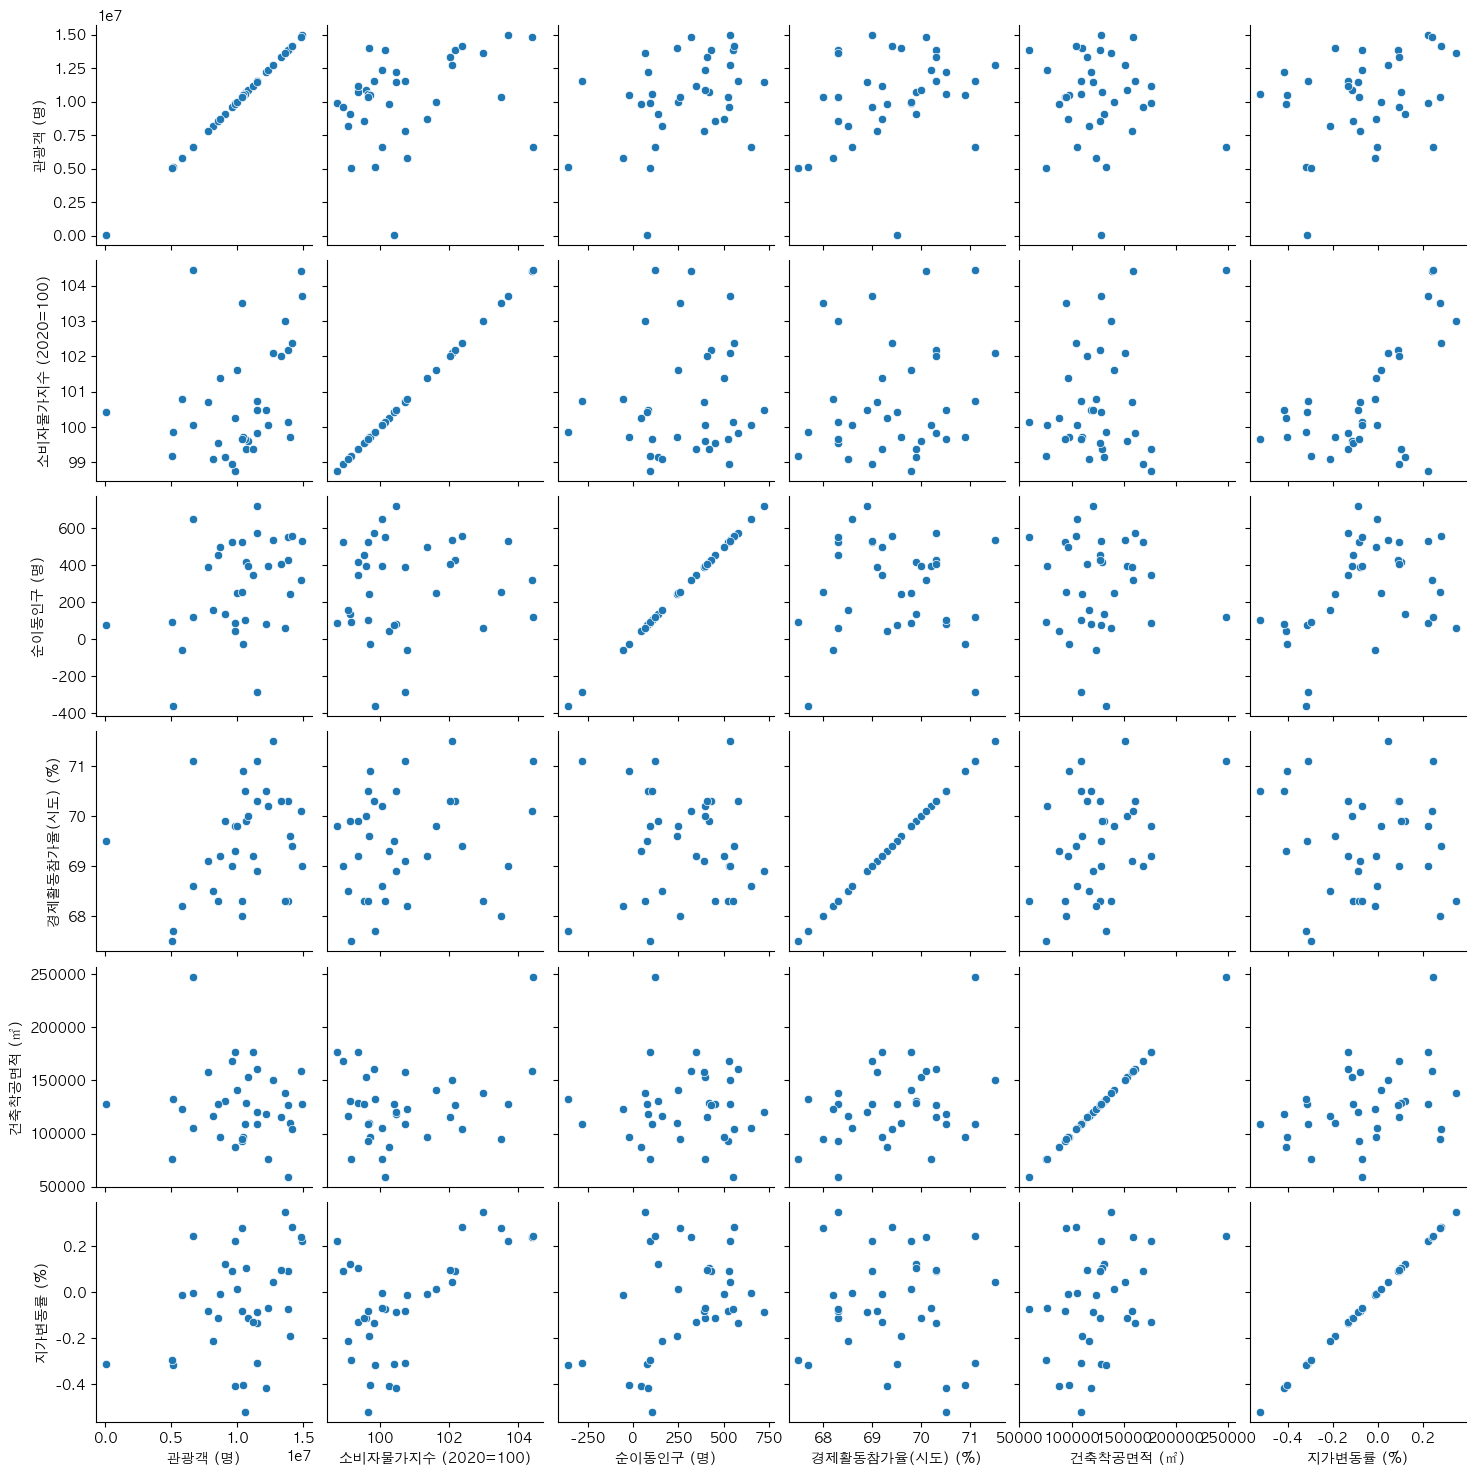

In [103]:
sns.pairplot(
    stat_joined,
    vars=['관광객 (명)','소비자물가지수 (2020=100)','순이동인구 (명)','경제활동참가율(시도) (%)','건축착공면적 (㎡)','지가변동률 (%)'],
    diag_kind=None
)
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.show()